In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from mpl_toolkits.mplot3d import Axes3D
#from scipy.interpolate import griddata
#import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
#import bisect

In [2]:
def function_f9(x:np.array):
    hasil = sum(x**2 - 10 * np.cos(2*np.pi*x) + 10)
    return hasil


In [3]:
x1 = np.arange(-3,6)
x2 = np.arange(-3,6)

In [4]:
pasangan = []
y_hasil= []

for i in x1:
    for j in x2:
        pasangan.append([i,j])
        y_hasil.append(function_f9(np.array([i,j])))

In [5]:
y_hasil

[18.0,
 13.0,
 10.0,
 9.0,
 10.0,
 13.0,
 18.0,
 25.0,
 34.0,
 13.0,
 8.0,
 5.0,
 4.0,
 5.0,
 8.0,
 13.0,
 20.0,
 29.0,
 10.0,
 5.0,
 2.0,
 1.0,
 2.0,
 5.0,
 10.0,
 17.0,
 26.0,
 9.0,
 4.0,
 1.0,
 0.0,
 1.0,
 4.0,
 9.0,
 16.0,
 25.0,
 10.0,
 5.0,
 2.0,
 1.0,
 2.0,
 5.0,
 10.0,
 17.0,
 26.0,
 13.0,
 8.0,
 5.0,
 4.0,
 5.0,
 8.0,
 13.0,
 20.0,
 29.0,
 18.0,
 13.0,
 10.0,
 9.0,
 10.0,
 13.0,
 18.0,
 25.0,
 34.0,
 25.0,
 20.0,
 17.0,
 16.0,
 17.0,
 20.0,
 25.0,
 32.0,
 41.0,
 34.0,
 29.0,
 26.0,
 25.0,
 26.0,
 29.0,
 34.0,
 41.0,
 50.0]

In [6]:
ind=y_hasil.index(min(y_hasil))
pasangan[ind]

[0, 0]

In [7]:
min(y_hasil)

0.0

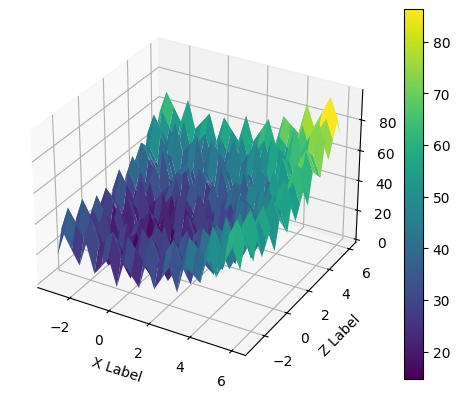

In [8]:
x = np.linspace(-3, 6, 25) 
z = np.linspace(-3, 6, 25) 

X, Y = np.meshgrid(x, z)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = function_f9(np.array([X[i, j], Y[i, j]]))

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('X Label')
ax.set_ylabel('Z Label')
ax.set_zlabel('Z Label')
fig.colorbar(surf)
plt.show()

In [10]:
class PSO:
    def __init__(self,objective_function, n_particles, n_dimensions, w, c1, c2, n_iterations,upper_bound,lower_bound):
        self.obj_function = objective_function
        self.n_particles = n_particles
        self.n_dimensions = n_dimensions
        self.w = w
        self.upper_bound = upper_bound
        self.lower_bound = lower_bound
        self.c1 = c1
        self.c2 = c2
        self.n_iterations = n_iterations
        self.pbest = np.zeros((n_particles, n_dimensions))
        self.gbest = np.zeros(n_dimensions)
        self.pbest_score = np.zeros(n_particles)
        self.gbest_score = math.inf
        self.particles = np.random.rand(n_particles, n_dimensions) * (self.upper_bound-self.lower_bound) + self.lower_bound
        self.velocities = np.zeros((n_particles, n_dimensions))
        self.history_particel = []
    
    def velocity(self,x):
        
        return self.w * x + self.c1 * np.random.rand() * (self.pbest - x) + self.c2 * np.random.rand() * (self.gbest - x)
    
    def position(self,x):
        return x + self.velocity(x)
    
    def fit(self):
        for i in range(self.n_iterations):
            for j in range(self.n_particles):
                score = self.obj_function(self.particles[j])
                if score < self.pbest_score[j]:
                    self.pbest_score[j] = score
                    self.pbest[j] = self.particles[j]
                if score < self.gbest_score:
                    self.gbest_score = score
                    self.gbest = self.particles[j]
            print(f"iterasi-{i+1} : global terbaik {self.gbest} score : {self.gbest_score} ")
            self.velocities = self.velocity(self.particles)
            self.particles = self.position(self.particles)
            self.history_particel.append(self.particles)
        return self.gbest
    

In [11]:
pso = PSO(function_f9,10,2,1,1,1,100,6,-3)
pso.fit()

iterasi-1 : global terbaik [-0.83263754  0.8853305 ] score : 9.000176335614674 
iterasi-2 : global terbaik [-1.02625199  0.9384989 ] score : 2.8070696707759613 
iterasi-3 : global terbaik [-1.02625199  0.9384989 ] score : 2.8070696707759613 
iterasi-4 : global terbaik [-1.02625199  0.9384989 ] score : 2.8070696707759613 
iterasi-5 : global terbaik [-1.02625199  0.9384989 ] score : 2.8070696707759613 
iterasi-6 : global terbaik [-1.02625199  0.9384989 ] score : 2.8070696707759613 
iterasi-7 : global terbaik [-1.02625199  0.9384989 ] score : 2.8070696707759613 
iterasi-8 : global terbaik [-1.02625199  0.9384989 ] score : 2.8070696707759613 
iterasi-9 : global terbaik [-1.02625199  0.9384989 ] score : 2.8070696707759613 
iterasi-10 : global terbaik [-1.02625199  0.9384989 ] score : 2.8070696707759613 
iterasi-11 : global terbaik [-1.02625199  0.9384989 ] score : 2.8070696707759613 
iterasi-12 : global terbaik [-1.02625199  0.9384989 ] score : 2.8070696707759613 
iterasi-13 : global terbai

array([-1.02625199,  0.9384989 ])

iterasi-1 : global terbaik [ 1.73292267 -0.0836639 ] score : 15.431112853562226 
iterasi-2 : global terbaik [ 1.73292267 -0.0836639 ] score : 15.431112853562226 
iterasi-3 : global terbaik [ 1.0644625  -0.05139126] score : 2.461625801159032 
iterasi-4 : global terbaik [ 1.0644625  -0.05139126] score : 2.461625801159032 
iterasi-5 : global terbaik [ 1.0644625  -0.05139126] score : 2.461625801159032 
iterasi-6 : global terbaik [ 1.0644625  -0.05139126] score : 2.461625801159032 
iterasi-7 : global terbaik [ 1.0644625  -0.05139126] score : 2.461625801159032 
iterasi-8 : global terbaik [ 1.0644625  -0.05139126] score : 2.461625801159032 
iterasi-9 : global terbaik [ 1.0644625  -0.05139126] score : 2.461625801159032 
iterasi-10 : global terbaik [ 1.0644625  -0.05139126] score : 2.461625801159032 
iterasi-11 : global terbaik [ 1.0644625  -0.05139126] score : 2.461625801159032 
iterasi-12 : global terbaik [ 1.0644625  -0.05139126] score : 2.461625801159032 
iterasi-13 : global terbaik [ 1.064

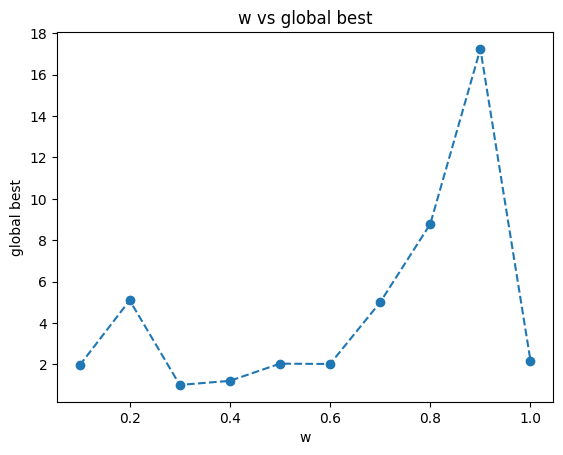

In [12]:
#w range 0.1 - 1 , c1 =1 , c2 = 1 , iterasi = 100 , partikel =10
w = [i/10 for i in range(1,11)]
hasil_w = []
for i in w:
    pso_w = PSO(function_f9,10,2,i,1,1,100,6,-3)
    pso_w.fit()
    hasil_w.append(pso_w.gbest_score)

#plot
plt.plot(w, hasil_w, linestyle='--', marker='o')
plt.xlabel("w")
plt.ylabel("global best")
plt.title("w vs global best")
plt.show()

iterasi-1 : global terbaik [-1.07938037 -2.07257955] score : 7.700816035980264 
iterasi-2 : global terbaik [-1.07938037 -2.07257955] score : 7.700816035980264 
iterasi-3 : global terbaik [-1.07938037 -2.07257955] score : 7.700816035980264 
iterasi-4 : global terbaik [-1.07938037 -2.07257955] score : 7.700816035980264 
iterasi-5 : global terbaik [-1.07938037 -2.07257955] score : 7.700816035980264 
iterasi-6 : global terbaik [-1.07938037 -2.07257955] score : 7.700816035980264 
iterasi-7 : global terbaik [-1.07938037 -2.07257955] score : 7.700816035980264 
iterasi-8 : global terbaik [-1.07938037 -2.07257955] score : 7.700816035980264 
iterasi-9 : global terbaik [-1.07938037 -2.07257955] score : 7.700816035980264 
iterasi-10 : global terbaik [-1.07938037 -2.07257955] score : 7.700816035980264 
iterasi-11 : global terbaik [-1.07938037 -2.07257955] score : 7.700816035980264 
iterasi-12 : global terbaik [-1.07938037 -2.07257955] score : 7.700816035980264 
iterasi-13 : global terbaik [-1.07938

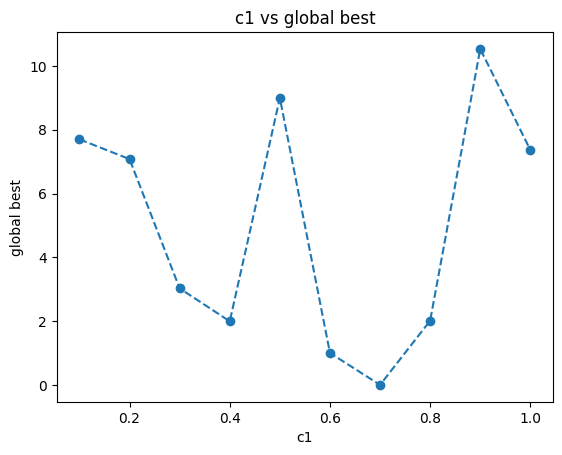

In [14]:
#c1 range 0.1 - 1 , c2 =1 , w = 0.3 , iterasi = 100 , partikel =10

c1 = [i/10 for i in range(1,11)]
hasil_c1 = []
for i in c1:
    pso_c1 = PSO(function_f9,10,2,0.3,i,1,100,6,-3)
    pso_c1.fit()
    hasil_c1.append(pso_c1.gbest_score)

#plot
plt.plot(c1, hasil_c1, linestyle='--', marker='o')
plt.xlabel("c1")
plt.ylabel("global best")
plt.title("c1 vs global best")
plt.show()

iterasi-1 : global terbaik [ 1.96372345 -2.07991485] score : 9.675255636861989 
iterasi-2 : global terbaik [-0.82510367  1.00217725] score : 7.140382879301133 
iterasi-3 : global terbaik [-0.82510367  1.00217725] score : 7.140382879301133 
iterasi-4 : global terbaik [1.93052868e-04 1.94056883e+00] score : 4.4549523747672355 
iterasi-5 : global terbaik [1.93052868e-04 1.94056883e+00] score : 4.4549523747672355 
iterasi-6 : global terbaik [1.08818007e-04 1.09383939e+00] score : 2.8849127071580503 
iterasi-7 : global terbaik [ 0.9669971  -0.03178633] score : 1.3490993186728364 
iterasi-8 : global terbaik [ 0.9669971  -0.03178633] score : 1.3490993186728364 
iterasi-9 : global terbaik [ 0.9669971  -0.03178633] score : 1.3490993186728364 
iterasi-10 : global terbaik [ 0.9669971  -0.03178633] score : 1.3490993186728364 
iterasi-11 : global terbaik [ 0.9669971  -0.03178633] score : 1.3490993186728364 
iterasi-12 : global terbaik [ 0.9669971  -0.03178633] score : 1.3490993186728364 
iterasi-13

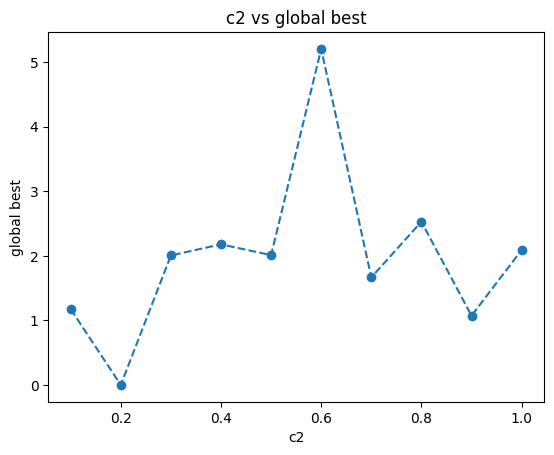

In [16]:
#c2 range 0.1 - 1 , c1 =0.7 , w = 0.3 , iterasi = 100 , partikel =10

c2 = [i/10 for i in range(1,11)]
hasil_c2 = []
for i in c2:
    pso_c2 = PSO(function_f9,10,2,0.3,0.7,i,100,6,-3)
    pso_c2.fit()
    hasil_c2.append(pso_c2.gbest_score)

#plot
plt.plot(c2, hasil_c2, linestyle='--', marker='o')
plt.xlabel("c2")
plt.ylabel("global best")
plt.title("c2 vs global best")
plt.show()

iterasi-1 : global terbaik [-0.07517675  2.05138511] score : 5.82550243585212 
iterasi-2 : global terbaik [-0.07517675  2.05138511] score : 5.82550243585212 
iterasi-3 : global terbaik [-0.07517675  2.05138511] score : 5.82550243585212 
iterasi-4 : global terbaik [-0.07517675  2.05138511] score : 5.82550243585212 
iterasi-5 : global terbaik [-0.03996706  1.0906009 ] score : 3.081672892687239 
iterasi-6 : global terbaik [-0.03996706  1.0906009 ] score : 3.081672892687239 
iterasi-7 : global terbaik [-0.03996706  1.0906009 ] score : 3.081672892687239 
iterasi-8 : global terbaik [-0.03996706  1.0906009 ] score : 3.081672892687239 
iterasi-9 : global terbaik [-0.03996706  1.0906009 ] score : 3.081672892687239 
iterasi-10 : global terbaik [-0.03996706  1.0906009 ] score : 3.081672892687239 
iterasi-1 : global terbaik [-0.95019862 -1.8338132 ] score : 9.725245517642529 
iterasi-2 : global terbaik [ 0.13751438 -0.11575695] score : 6.068942962403973 
iterasi-3 : global terbaik [ 0.13751438 -0.

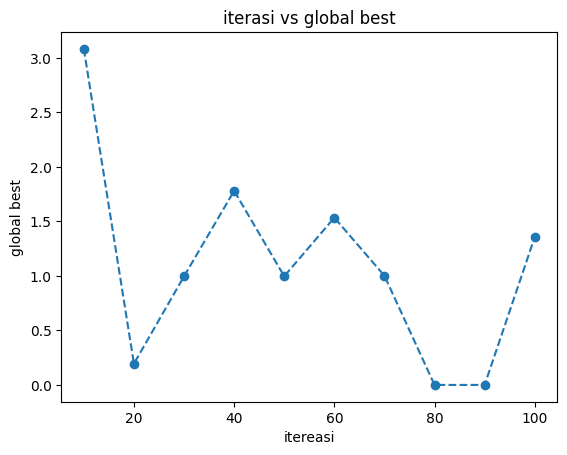

In [17]:
#w =1 , c1 =1 , c2 = 1 , iterasi = 100, iterasi 10 -100 , partikel =10
iter = [i*10 for i in range(1,11)]
hasil_iter = []

for i in iter:
    pso_iter = PSO(function_f9,10,2,0.3,0.7,0.2,int(i),6,-3)
    pso_iter.fit()
    hasil_iter.append(pso_iter.gbest_score)

#plot
plt.plot(iter, hasil_iter, linestyle='--', marker='o')
plt.xlabel("itereasi")
plt.ylabel("global best")
plt.title("iterasi vs global best")
plt.show()

iterasi-1 : global terbaik [ 0.0538216  -0.18322072] score : 6.529006804189645 
iterasi-2 : global terbaik [ 0.0538216  -0.18322072] score : 6.529006804189645 
iterasi-3 : global terbaik [ 0.0415861  -0.14156835] score : 4.06320039380426 
iterasi-4 : global terbaik [ 0.03905403 -0.13294862] score : 3.6095085242807716 
iterasi-5 : global terbaik [ 0.0304505  -0.10366028] score : 2.2412811769799763 
iterasi-6 : global terbaik [ 0.02597296 -0.08841773] score : 1.6452253077325807 
iterasi-7 : global terbaik [ 0.02162276 -0.0736087 ] score : 1.1486220876334787 
iterasi-8 : global terbaik [ 0.01866363 -0.06353515] score : 0.8593539345795094 
iterasi-9 : global terbaik [ 0.01793455 -0.06105319] score : 0.7942715829247948 
iterasi-10 : global terbaik [ 0.01793455 -0.06105319] score : 0.7942715829247948 
iterasi-11 : global terbaik [ 0.01793455 -0.06105319] score : 0.7942715829247948 
iterasi-12 : global terbaik [ 0.01793455 -0.06105319] score : 0.7942715829247948 
iterasi-13 : global terbaik [

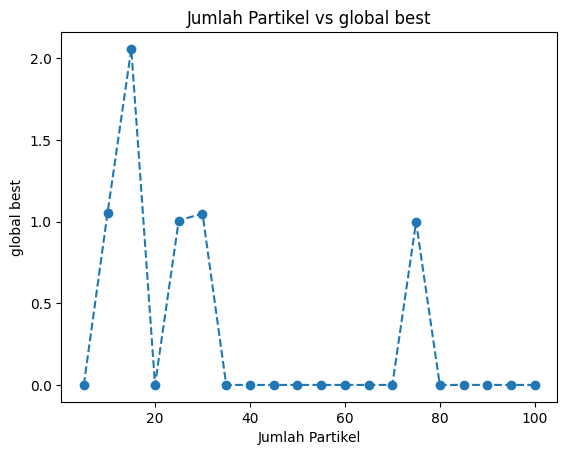

In [18]:
#w = 1 , c1 =1 , c2 = 1 , iterasi = 100, iterasi = 100 , partikel 5 -100
parti = [i*5 for i in range(1,21)]
hasil_parti = []

for i in parti:
    pso_parti = PSO(function_f9,int(i),2,0.3,0.7,0.2,80,6,-3)
    pso_parti.fit()
    hasil_parti.append(pso_parti.gbest_score)

#plot
plt.plot(parti, hasil_parti, linestyle='--', marker='o')
plt.xlabel("Jumlah Partikel")
plt.ylabel("global best")
plt.title("Jumlah Partikel vs global best")
plt.show()

In [19]:
"""_summary_
parameter optimal pso
c1 : 0.7
c2 : 0.2
w : 0.3
iterasi : 80
jumlah partikel : 40
"""

pso2 = PSO(function_f9,40,2,0.3,0.7,0.2,80,6,-3)
pso2.fit()

iterasi-1 : global terbaik [ 1.77094773 -0.15676415] score : 16.319630358466316 
iterasi-2 : global terbaik [-0.1026371  -2.05893359] score : 6.935848345783911 
iterasi-3 : global terbaik [-0.1026371  -2.05893359] score : 6.935848345783911 
iterasi-4 : global terbaik [-1.99014365 -0.98496142] score : 4.994599547841528 
iterasi-5 : global terbaik [0.99495815 1.02864152] score : 2.214553798909817 
iterasi-6 : global terbaik [0.99495815 1.02864152] score : 2.214553798909817 
iterasi-7 : global terbaik [0.99495815 1.02864152] score : 2.214553798909817 
iterasi-8 : global terbaik [-0.05806108 -0.07063926] score : 1.6353444110974493 
iterasi-9 : global terbaik [-0.05806108 -0.07063926] score : 1.6353444110974493 
iterasi-10 : global terbaik [-0.05806108 -0.07063926] score : 1.6353444110974493 
iterasi-11 : global terbaik [-0.04425321 -0.0538401 ] score : 0.9556908763745255 
iterasi-12 : global terbaik [-0.04425321 -0.0538401 ] score : 0.9556908763745255 
iterasi-13 : global terbaik [-0.03682

array([ 1.82469779e-08, -2.28362282e-08])

iterasi-1 : global terbaik [-0.0831524  -0.05600922] score : 1.9569796051602406 
iterasi-2 : global terbaik [-0.0831524  -0.05600922] score : 1.9569796051602406 
iterasi-3 : global terbaik [-0.0831524  -0.05600922] score : 1.9569796051602406 
iterasi-4 : global terbaik [-0.0831524  -0.05600922] score : 1.9569796051602406 
iterasi-5 : global terbaik [-0.06377666 -0.04295824] score : 1.160174601265446 
iterasi-6 : global terbaik [0.98464422 0.02143798] score : 1.1070745461964453 
iterasi-7 : global terbaik [0.98464422 0.02143798] score : 1.1070745461964453 
iterasi-8 : global terbaik [0.98464422 0.02143798] score : 1.1070745461964453 
iterasi-9 : global terbaik [0.98464422 0.02143798] score : 1.1070745461964453 
iterasi-10 : global terbaik [-0.04329166 -0.05016447] score : 0.8646944570575705 
iterasi-11 : global terbaik [-0.02993827 -0.03469115] score : 0.41511881112138127 
iterasi-12 : global terbaik [-0.02993827 -0.03469115] score : 0.41511881112138127 
iterasi-13 : global terbaik [-0.

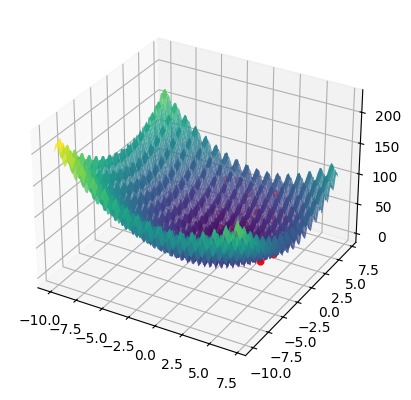

In [20]:
x = np.linspace(-10, 7, 100)
y = np.linspace(-10, 7, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([function_f9(np.array([xi, yi])) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)
pso3 = PSO(function_f9,40,2,0.3,0.7,0.2,80,6,-3)
points = ax.scatter(pso3.particles[:, 0], pso3.particles[:, 1], [function_f9(p) for p in pso3.particles], color='r')
pso3.fit()
list_poin = pso3.history_particel


def update(frame):
    titik_poin = list_poin[frame]
    print(titik_poin)
    points._offsets3d = (titik_poin[:, 0], titik_poin[:, 1], [function_f9(p) for p in titik_poin])
    return points,

ani = FuncAnimation(fig, update, frames=np.arange(len(list_poin)), interval=100,)
plt.show()